In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import dirname, join as pjoin
import statsmodels.formula.api as smf

In [2]:
data = sio.loadmat('HW3_data.mat')

In [3]:
sorted(data.keys())

['__globals__', '__header__', '__version__', 'ild', 'sn', 'spike_count']

In [4]:
df = pd.DataFrame(data = data['ild'], columns=['ild'])

In [5]:
df['sn'] = data['sn']
df['spike_count'] = data['spike_count']

In [6]:
df

,ild,sn,spike_count
0,1,1,11
1,1,1,5
2,1,1,32
3,1,1,16
4,1,1,28
...,...,...,...
2545,5,5,28
2546,5,5,30
2547,5,5,35
2548,5,5,34


# Q1 fitting tuning curves with linear regression

## Q1a mean and std of the spike count as a function of SN

In [7]:
df['sn'].unique()
df['mean_spike'] = 0
df['std_spike'] = 0

In [8]:
all_sn= []
for a in df['sn'].unique():
    print(a)
    for i in df.index:
        if df['sn'][i] == a:
            all_sn.append(df['spike_count'][i])
    mean_sn = np.mean(all_sn)
    std_sn = np.std(all_sn)
    for i in df.index:
        if df['sn'][i] == a:
            df['mean_spike'][i] = mean_sn
            df['std_spike'][i] = std_sn

1


<ipython-input-8-a21915182b1d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_spike'][i] = mean_sn
<ipython-input-8-a21915182b1d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std_spike'][i] = std_sn


2
3
4
5


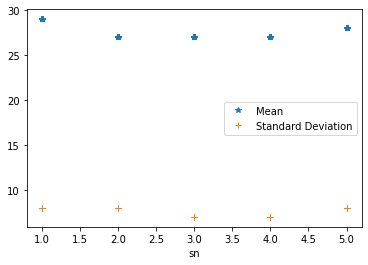

In [9]:
plt.plot(df['sn'], df['mean_spike'], '*', label = 'Mean')
plt.plot(df['sn'], df['std_spike'], '+', label = 'Standard Deviation')
plt.xlabel('sn')
plt.legend()
plt.show()

No handles with labels found to put in legend.


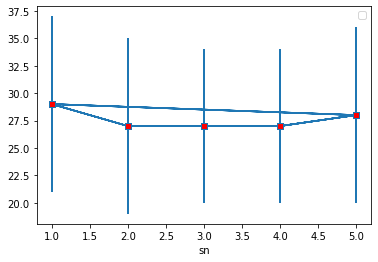

In [10]:
plt.errorbar(df['sn'], df['mean_spike'], yerr= df['std_spike'],marker='s', mfc='red')
#plt.errorbar(df['sn'], df['mean_spike'])
#sns.boxplot(df['sn'], df['std_spike'])
plt.xlabel('sn')
plt.legend()
plt.show()

## Q1b linear regression line to the spike count data as a function of SN. 

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
X = np.array(df['sn'])

In [14]:
model.fit(X.reshape((-1,1)), df['spike_count'])

LinearRegression()

In [15]:
model.coef_[0]

1.1237254901960774

In [16]:
model.intercept_

25.590784313725493

In [17]:
model.score(X.reshape((-1,1)), df['spike_count'])

0.03912527048929382

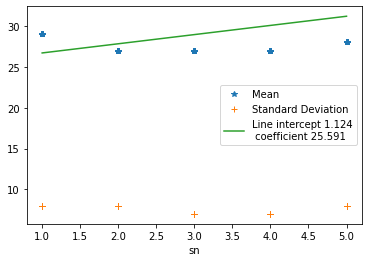

In [18]:
plt.plot(df['sn'], df['mean_spike'], '*', label = 'Mean')
plt.plot(df['sn'], df['std_spike'], '+', label = 'Standard Deviation')
plt.plot(df['sn'], model.coef_[0]*df['sn']+ model.intercept_, label = 'Line intercept {}\n coefficient {}'.format(np.round(model.coef_[0],3), np.round(model.intercept_, 3)))
plt.xlabel('sn')
plt.legend()
plt.show()

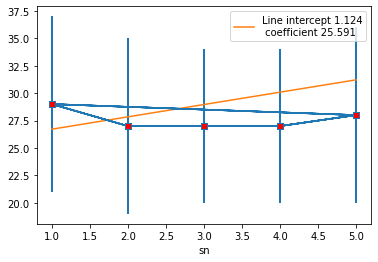

In [19]:
plt.errorbar(df['sn'], df['mean_spike'], yerr= df['std_spike'],marker='s', mfc='red')
plt.plot(df['sn'], model.coef_[0]*df['sn']+ model.intercept_, label = 'Line intercept {}\n coefficient {}'.format(np.round(model.coef_[0],3), np.round(model.intercept_, 3)))
#plt.errorbar(df['sn'], df['mean_spike'])
#sns.boxplot(df['sn'], df['std_spike'])
plt.xlabel('sn')
plt.legend()
plt.show()

In [20]:
corr_matrix = np.corrcoef(df['spike_count'], model.coef_[0]*df['sn']+ model.intercept_)
corr = corr_matrix[0,1]
R_square = corr**2
print('The R square value is: ', R_square)

The R square value is:  0.039125270489293845


In [21]:
model = smf.ols('spike_count ~ sn' , data = df).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            spike_count   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.55e-24
Time:                        12:36:03   Log-Likelihood:                -8880.9
No. Observations:                2550   AIC:                         1.777e+04
Df Residuals:                    2548   BIC:                         1.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5908      0.366     69.939      0.000      24.873      26.308
sn             1.1237      0.110     10.186      0.000       0.907       1.340
==============================================================================
Omnibus:                       27.581   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.552
Skew:                           0.120   Prob(JB):                     3.44e-05
Kurtosis:                       2.631   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q1c the mean and std of the spike count as a function of ILD

In [23]:
all_sn= []
df['mean_spike_ild'] =0
df['std_spike_ild'] =0
for a in df['ild'].unique():
    print(a)
    for i in df.index:
        if df['ild'][i] == a:
            all_sn.append(df['spike_count'][i])
    mean_sn = np.mean(all_sn)
    std_sn = np.std(all_sn)
    for i in df.index:
        if df['ild'][i] == a:
            df['mean_spike_ild'][i] = mean_sn
            df['std_spike_ild'][i] = std_sn

1


<ipython-input-23-12a07d834229>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_spike_ild'][i] = mean_sn
<ipython-input-23-12a07d834229>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std_spike_ild'][i] = std_sn


2
3
4
5


Text(0.5, 0, 'ild')

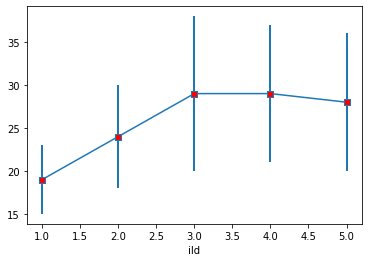

In [24]:
plt.errorbar(df['ild'], df['mean_spike_ild'], yerr= df['std_spike_ild'],marker='s', mfc='red')
plt.xlabel('ild')

# Q 1d Fit a linear regression line to the spike count data as a function of ILD.

In [25]:
lr = LinearRegression()

In [26]:
x1 = np.array(df['ild'])

In [27]:
lr.fit(x1.reshape((-1,1)), df['spike_count'])

LinearRegression()

In [28]:
lr.coef_

array([1.46470588])

In [29]:
lr.intercept_

24.567843137254897

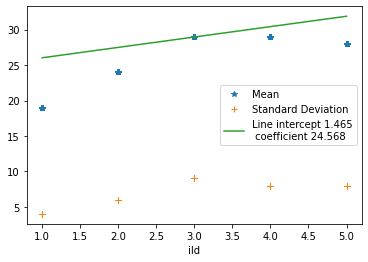

In [30]:
plt.plot(df['ild'], df['mean_spike_ild'], '*', label = 'Mean')
plt.plot(df['ild'], df['std_spike_ild'], '+', label = 'Standard Deviation')
plt.plot(df['ild'], lr.coef_[0]*df['ild']+ lr.intercept_, label = 'Line intercept {}\n coefficient {}'.format(np.round(lr.coef_[0],3), np.round(lr.intercept_, 3)))
plt.xlabel('ild')
plt.legend()
plt.show()

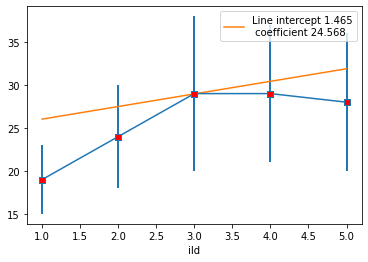

In [31]:
plt.errorbar(df['ild'], df['mean_spike_ild'], yerr= df['std_spike_ild'],marker='s', mfc='red')
plt.plot(df['ild'], lr.coef_[0]*df['ild']+ lr.intercept_, label = 'Line intercept {}\n coefficient {}'.format(np.round(lr.coef_[0],3), np.round(lr.intercept_, 3)))
plt.xlabel('ild')
plt.legend()
plt.show()

In [32]:
corr_matrix = np.corrcoef(df['spike_count'], lr.coef_[0]*df['ild']+ lr.intercept_)
corr = corr_matrix[0,1]
R_square = corr**2
print('The R square value is: ', R_square)

The R square value is:  0.0664718459904284


In [33]:
model = smf.ols('spike_count ~ ild' , data = df).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            spike_count   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           5.34e-40
Time:                        12:36:14   Log-Likelihood:                -8844.1
No. Observations:                2550   AIC:                         1.769e+04
Df Residuals:                    2548   BIC:                         1.770e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5678      0.361     68.120      0.000      23.861      25.275
ild            1.4647      0.109     13.470      0.000       1.251       1.678
==============================================================================
Omnibus:                       72.010   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.530
Skew:                           0.280   Prob(JB):                     5.30e-13
Kurtosis:                       2.534   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q 1e

In [35]:
linear = LinearRegression()

In [36]:
linear.fit(df[['sn', 'ild']], df['spike_count'])

LinearRegression()

In [37]:
linear.coef_

array([1.12372549, 1.46470588])

In [38]:
linear.intercept_

21.196666666666697

In [39]:
corr_matrix = np.corrcoef(df['spike_count'], linear.coef_[0]*df['sn']+linear.coef_[1]*df['ild'] + linear.intercept_)
corr = corr_matrix[0,1]
R_square = corr**2
print('The R square value is ', R_square)

The R square value is  0.10559711647972249


In [40]:
import statsmodels.api as sm

In [41]:
x = (df[['sn', 'ild']])
y = df['spike_count']
model = sm.OLS(y, x)
model = model.fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            spike_count   R-squared (uncentered):               -6384.148
Model:                            OLS   Adj. R-squared (uncentered):          -6389.159
Method:                 Least Squares   F-statistic:                             -1274.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        1.00
Time:                        12:36:20   Log-Likelihood:                         -9523.4
No. Observations:                2550   AIC:                                  1.905e+04
Df Residuals:                    2548   BIC:                                  1.906e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sn             4.3032      0.105     40.881      0.000       4.097       4.510
ild            4.6442      0.105     44.120      0.000       4.438       4.851
==============================================================================
Omnibus:                        5.168   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.798
Skew:                          -0.063   Prob(JB):                       0.0908
Kurtosis:                       2.829   Cond. No.                         3.16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q2 Information carried by spike count.

# Q2a make 2 histograms: p(r|ild=3) and p(r|ild=5).

In [43]:
df_ild3 = df[df['ild'] ==3]
un_cn = df_ild3['spike_count'].unique()
a = range(5,55,1)
pild3 = []
for i in a:
    count = 0
    for t in df_ild3.index:
        if df_ild3['spike_count'][t] == i: #& df_ild3['spike_count'][t] > a[i-1]:
            count = count + 1
            df_ild3 = df_ild3.drop(index = t)
    pild3.append(count)
df_ild3 = df[df['ild'] ==3]

In [44]:
df_ild5 = df[df['ild'] ==5]
un_cn = df_ild5['spike_count'].unique()
a = range(5,55,1)
pild5 = []
for i in a:
    count = 0
    for t in df_ild5.index:
        if df_ild5['spike_count'][t] < i: #& df_ild3['spike_count'][t] > a[i-1]:
            count = count + 1
            df_ild5 = df_ild5.drop(index = t)
    pild5.append(count)
df_ild5 = df[df['ild'] ==5]

In [45]:
pild3 = np.array(pild3)
pild3 = pild3/len(df_ild3)

In [46]:
pild5 = np.array(pild5)
pild5 = pild5/len(df_ild5)

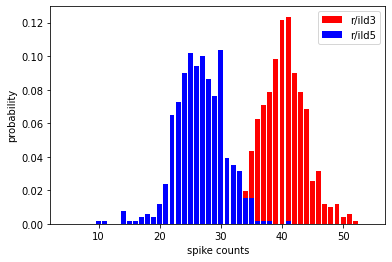

In [47]:
plt.bar(a, height = pild3,color = 'r', label = 'r/ild3')
plt.bar(a, height = pild5, color='b', label = 'r/ild5')
plt.xlabel('spike counts')
plt.ylabel('probability')
plt.legend()
plt.show()

# Q2b Repeat 2a for p(r|sn=3) and p(r|sn=5).

In [48]:
df_sn3 = df[df['sn'] ==3]
un_cn = df_ild3['spike_count'].unique()
a = range(5,55,1)
psn3 = []
for i in a:
    count = 0
    for t in df_sn3.index:
        if df_sn3['spike_count'][t] == i: #& df_ild3['spike_count'][t] > a[i-1]:
            count = count + 1
            df_sn3 = df_sn3.drop(index = t)
    psn3.append(count)
df_sn3 = df[df['sn'] ==3]

In [49]:
df_sn5 = df[df['sn'] ==5]
un_cn = df_sn5['spike_count'].unique()
a = range(5,55,1)
psn5 = []
for i in a:
    count = 0
    for t in df_sn5.index:
        if df_sn5['spike_count'][t] < i: #& df_ild3['spike_count'][t] > a[i-1]:
            count = count + 1
            df_sn5 = df_sn5.drop(index = t)
    psn5.append(count)
df_sn5 = df[df['sn'] ==5]

In [50]:
psn3 = np.array(psn3)
psn3 = psn3/len(df_sn3)

In [51]:
psn5 = np.array(psn5)
psn5 = psn5/len(df_sn5)

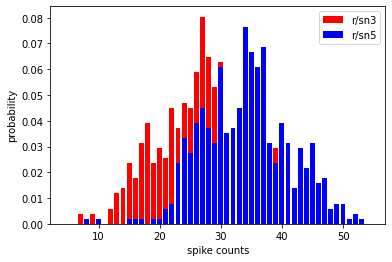

In [52]:
plt.bar(a, height = psn3,color = 'r', label = 'r/sn3')
plt.bar(a, height = psn5, color='b', label = 'r/sn5')
plt.xlabel('spike counts')
plt.ylabel('probability')
plt.legend()
plt.show()

## Q 2c From questions 1, 2a, and 2b, would you expect spike count to carry more information about ILD or SN?

### SN counts more information about spike count coz it is providing a greater linear correlation with the spike count, a higher R-square value and also has a higher probability distribution in the histogram plot


# Q2d Compute H(ILD), H(SN), and H(R).

In [53]:
hild =0
for i in df['ild'].unique():
    df_i = df[df['ild']==i]
    pild_i = len(df_i)/len(df)
    hild = hild - pild_i*np.log2(pild_i)
print('The entropy is ', hild)

The entropy is  2.321928094887362


In [54]:
hsn =0
for i in df['sn'].unique():
    df_i = df[df['sn']==i]
    psn_i = len(df_i)/len(df)
    hsn = hsn - psn_i*np.log2(psn_i)
print('The entropy is ', hsn)

The entropy is  2.321928094887362


In [55]:
hr =0
for i in df['spike_count'].unique():
    df_i = df[df['spike_count']==i]
    pr_i = len(df_i)/len(df)
    hr = hr - pr_i*np.log2(pr_i)
print('The entropy is ', hr)

The entropy is  5.002630649815191


# Q 2d What’s the maximum value of MI(R;ILD)? MI(R;SN)?

## The max value of MI(R;ILD) is H(ILD) since the mutual information can never convey more information than the smallest individual amount of information

## The max value of MI(R; SN) is H(SN)


# Q 2e H(R|ILD)

In [56]:

#un_cn = df_ild3['spike_count'].unique()
a = range(5,55,1)
prob_ild = []
for ild in df['ild'].unique():
    pild3 = []
    df_ild3 = df[df['ild'] ==ild]
    for i in df_ild3['spike_count'].unique():
        count = 0
        for t in df_ild3.index:
            if df_ild3['spike_count'][t] == i: #& df_ild3['spike_count'][t] > a[i-1]:
                count = count + 1
                df_ild3 = df_ild3.drop(index = t)
        pild3.append(count)
    pild3 = np.array(pild3)  
    df_ild3 = df[df['ild'] ==ild]
    prob_spike = np.array(pild3)/len(df_ild3)
    print(np.sum(prob_spike))
    entropy = -np.sum(np.dot(prob_spike,np.log2(prob_spike)))
    print(entropy)
    prob_ild.append(entropy)

1.0
4.047511220629957
0.9999999999999998
4.09787993120655
0.9999999999999999
3.9656772369287108
1.0
3.9437976538202557
1.0
3.9633725063674996


In [57]:
print('THe H(R|ILD) value is' , np.sum(prob_ild)/5)

THe H(R|ILD) value is 4.003647709790594


# Q 2e H(R|SN)

In [58]:
#un_cn = df_ild3['spike_count'].unique()
a = range(5,55,1)
prob_sn = []
for sn in df['sn'].unique():
    psn3 = []
    df_sn3 = df[df['sn'] ==sn]
    for i in df_sn3['spike_count'].unique():
        count = 0
        for t in df_sn3.index:
            if df_sn3['spike_count'][t] == i: #& df_ild3['spike_count'][t] > a[i-1]:
                count = count + 1
                df_sn3 = df_sn3.drop(index = t)
        psn3.append(count)
    psn3 = np.array(psn3)  
    df_sn3 = df[df['sn'] ==sn]
    prob_spike = np.array(psn3)/len(df_sn3)
    print(sum(prob_spike))
    entropy = -np.sum(np.dot(prob_spike,np.log2(prob_spike)))
    print(entropy)
    prob_sn.append(entropy)

1.0
4.917445902013304
1.0000000000000002
4.814181395160432
1.0
4.851224394312198
0.9999999999999999
4.815282491516437
0.9999999999999998
4.773947558967968


In [59]:
print('The H(R|SN) value is ' ,np.sum(prob_sn)/5)

The H(R|SN) value is  4.834416348394068


# Q 2f MI(R;ILD) and MI(R;SN)

In [60]:
H_ild = hild
H_rild = np.sum(prob_ild)/5

In [61]:
print('The MI(R;ILD) is ', H_ild - H_rild)

The MI(R;ILD) is  -1.681719614903232


In [62]:
H_sn = hsn
H_rsn = np.sum(prob_sn)/5

In [63]:
print('The MI(R;SN) is ', H_sn - H_rsn)

The MI(R;SN) is  -2.512488253506706


# Q 2g Joint entropy H(ILD|SN)

### The joint entropy would be the sum of individual entropies since both ild and sn are independent

In [64]:
h_ild_sn = hild + hsn 
print('The H(ILD|SN) is ', h_ild_sn)

The H(ILD|SN) is  4.643856189774724


# Q2g Mutual Information MI(R;ILD,SN)

## MI(R;ILD,SN) = MI(R;ILD) + MI(R;SN|ILD) 
## and since ILD does not impact on SN, MI(R;SN|ILD) = MI(R;SN)

In [71]:
from collections import defaultdict

In [72]:
vals = defaultdict(list)

hr_snild = 0

for i in range(len(df)):
    vals[(df.iloc[i]['ild'], df.iloc[i]['sn'])].append(df.iloc[i]['spike_count'])
    
for key in vals.keys():
    sc = np.array(vals[key])
    
    minimum,maximum = np.min(sc) , np.max(sc)
    pr_s = np.zeros(maximum - minimum + 1)
    
    hr_snilds = 0
    
    for j in range(minimum, maximum +1):
        pr_s[j - minimum] = ((sc == j).sum())/len(sc)
        if pr_s[j - minimum] > 0:
            hr_snilds += pr_s[j - minimum]*np.log2(pr_s[j-minimum])
    
    hr_snilds += -1
    hr_snild += (hr_snilds* (1/25))

In [73]:
print('The MI(R;ILD, SN) is ', h_ild_sn - hr_snild )

The MI(R;ILD, SN) is  9.11896939515865


# Q 2h contrast the differences between R2 and MI.

## R2 value is derived from the correlation of the x and y. 

### The Cov(X,Y) = summation([p(x,y)  - p(x)p(y)]xy

### Whereas Mutual Information is: summation (p(x, y)[ ln p(x, y) - ln(p(x)p(y))])

### each contains a point-wise "measure" of "the distance of the two rv's from independence" as it is expressed by the distance of the joint pmf from the product of the marginal pmf's: the Cov(X,Y) has it as difference of levels, while I(X,Y) has it as difference of logarithms.

# Q 2h Does firing rate code for SN cues in a linear manner? How about ILD cues?


### If you rightly observe the mean variation plot on varying SN on the x-axis, the trend is somewhat parallel to x- axis. That means there is minimal change in the SN on increasing the value of SN. Thus the trend is not really like a linear manner. 

### In the ILD trend, the mean value firstly increases upto a point with ILD but then stabilizes later on further increasing ILD. Hence this trend is definitely not linear.

# Q3 

## I spent around 3 to 4 hrs on each question and the 2nd question taught me the most. It was convenient to code in python. So didnt have to spend a lot of time debugging the code. 